## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [10]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

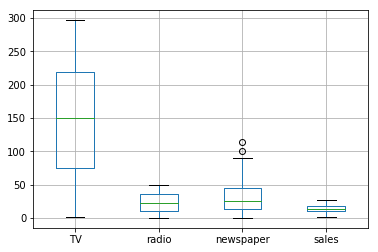

In [15]:
df.boxplot(return_type='axes')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

Text(0,0.5,u'Sales in dollars')

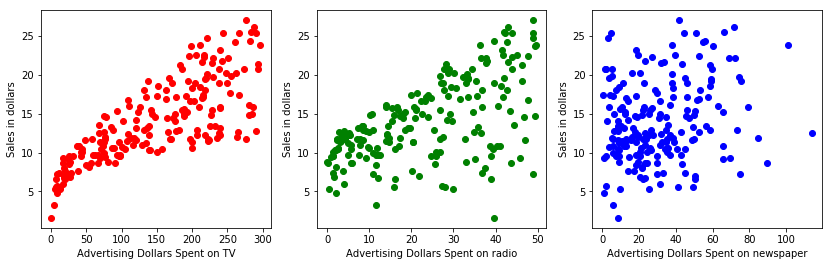

In [82]:
fig = plt.figure(figsize=(14,4))

axes = fig.add_subplot(1,3,1)
plt.scatter(df['TV'], df['sales'], c='r')
plt.xlabel('Advertising Dollars Spent on TV')
plt.ylabel('Sales in dollars')

axes = fig.add_subplot(1,3,2)
plt.scatter(df['radio'], df['sales'], c='g')
plt.xlabel('Advertising Dollars Spent on radio')
plt.ylabel('Sales in dollars')

axes = fig.add_subplot(1,3,3)
plt.scatter(df['newspaper'], df['sales'], c='b')
plt.xlabel('Advertising Dollars Spent on newspaper')
plt.ylabel('Sales in dollars')

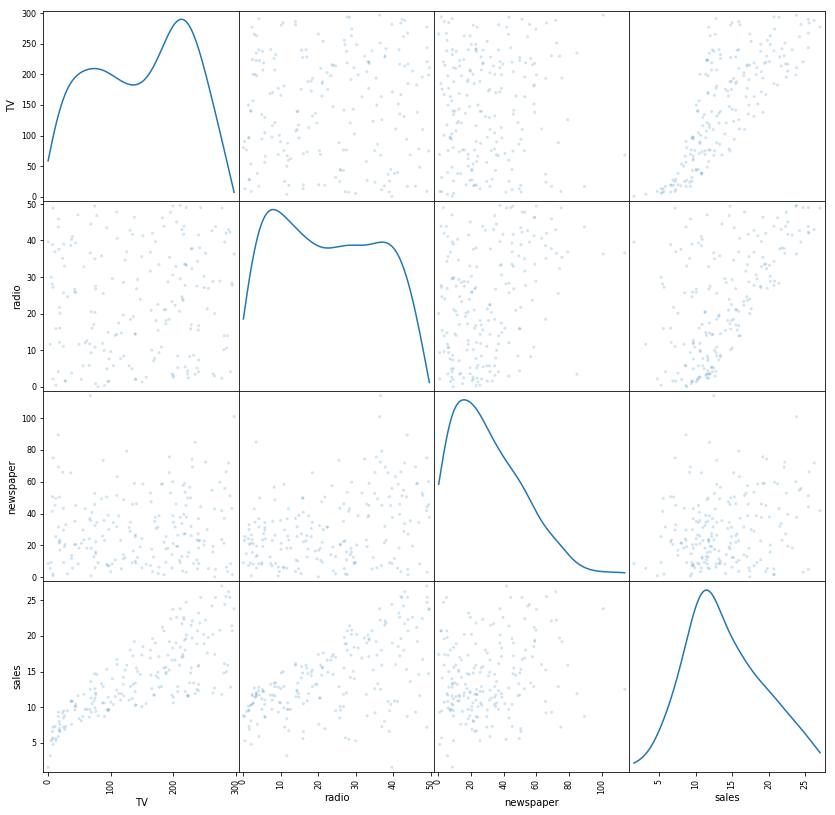

In [28]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

**Response:**

From the scattered figures, it is hard to predict which of the variables correlated with one another since they all look like distributed randomly. Looking at the bottom row, it seems like the sales variable is corrleated with TV and radio because the scattered points are nearby distributed around a 'straight line'.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [29]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [31]:
y = df['sales']

b) Set X to be just the features described above in df

In [33]:
X = df[['TV', 'radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

d) Train model on training data, and make predictions on testing data

In [36]:
# Linear regreesion model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict the testing data
regr.predict(X_test)

array([  3.60488283,  17.03993231,  21.95527686,   9.49433815,
        12.48945536,  17.06638867,  13.87645116,   9.03427099,
         6.57262924,   9.9492149 ,  17.35021723,   9.66193043,
        11.83095487,   8.40365647,  23.82922307,  17.23183546,
        12.72257228,  20.81764998,  18.32406934,  19.21539524,
        15.74861214,   7.93850059,  13.02800367,  12.34642759,
        16.74422969,  20.33192174,   8.86495524,  18.93319658,
        12.67931771,  13.30213507,  17.00614779,  19.38224917,
        21.39254852,  20.90504532,  14.67401115,  12.11183727,
        13.66257394,  14.4643698 ,  10.43311174,   4.48340787])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [37]:
score_ = regr.score(X_test, y_test)
print 'R^2 score on testing data is ', score_

R^2 score on testing data is  0.891064250335


**Response:**

R^2 on tesing data is about 0.89, which means 89% of total variation of outcomes interpreted by our fitted model.
It is good.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

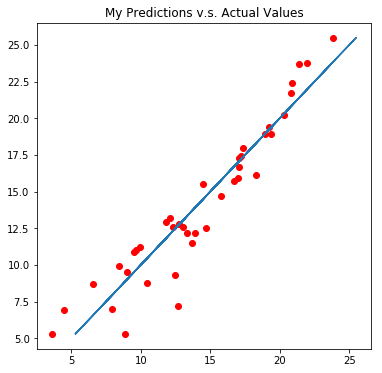

In [52]:
plt.figure(figsize=(6,6))
plt.title("My Predictions v.s. Actual Values")
plt.scatter(regr.predict(X_test), y_test, c='r')
plt.plot(y_test, y_test)

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [51]:
coef_ = regr.coef_
print coef_

[ 0.04536381  0.19052271  0.00068187]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

**Response:**

We can easily conclude that the most important variable to sales is the radio - if we only look at the values of the coefficients of the fitted model. However, it is not fair to compare the three variables because they have not been normalized before the training. It is easily to interpret that the magnitude of TV is much higher than the others. The essential thing that we should have done before training to measure the importance of the features involved is **normalization**.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

It seems like it needs nonlinear/non-parametric model to train the data since the hyperplane are far-away from TV and radio samples at some places. Here we simply add a t

Text(0.5,0,u'sales')

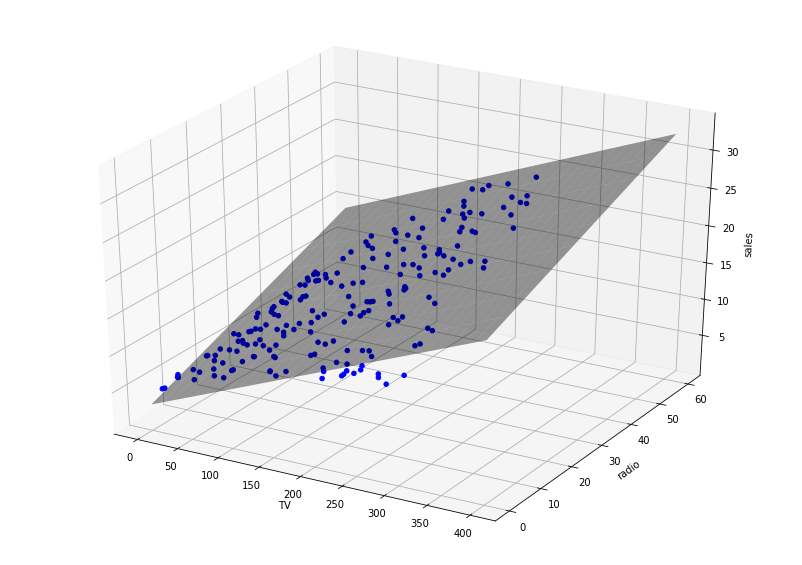

In [154]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d

X = df[['TV', 'radio']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

# Linear regreesion model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict the testing data
regr.predict(X_test)
coef_ = regr.coef_

fig = plt.figure(figsize=(14, 10))

axes = fig.add_subplot(1,1,1, projection='3d')
x = np.linspace(0, 400, 30)
y = np.linspace(0, 60,10)
XG, YG = np.meshgrid(x,y)
ZG = regr.predict(np.array([XG.ravel(), YG.ravel()]).T).reshape(XG.shape)

# Plot hyperplane in 3D space
axes.plot_surface(XG, YG, ZG, rstride=1,cstride=1, color='black', alpha=0.4)

axes.scatter(df['TV'], df['radio'], df['sales'], c='b', marker='o', alpha=1)
axes.set_xlabel('TV')
axes.set_ylabel('radio')
axes.set_zlabel('sales')

Text(0.5,0,u'sales')

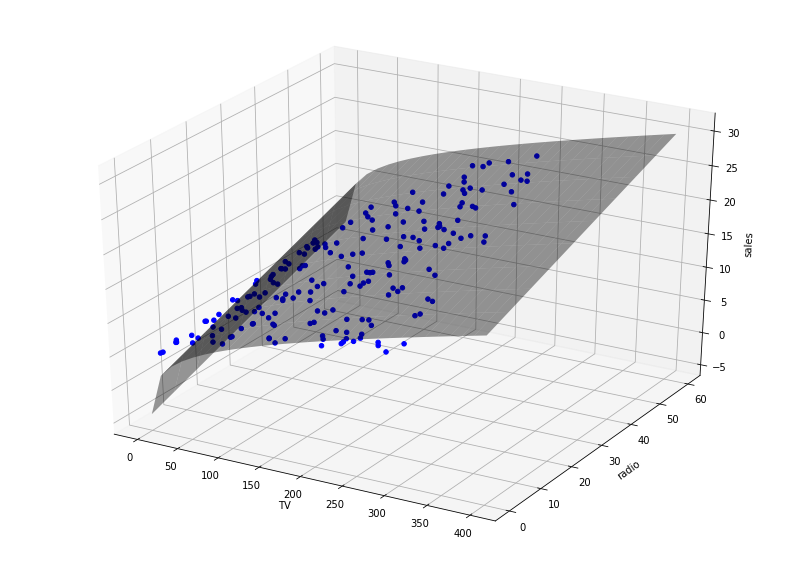

In [168]:
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits.mplot3d import axes3d

df['log(TV)'] = log(df['TV']*+1)
X = df[['TV', 'radio','log(TV)']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

# Linear regreesion model
regr_ = LinearRegression()
regr_.fit(X_train, y_train)

# Predict the testing data
regr_.predict(X_test)
coef_nl_ = regr_.coef_

fig = plt.figure(figsize=(14, 10))

axes = fig.add_subplot(1,1,1, projection='3d')
x = np.linspace(0, 400, 30)
y = np.linspace(0, 60,10)
XG, YG = np.meshgrid(x,y)
ZG = regr_.predict(np.array([XG.ravel(), YG.ravel(), log(XG.ravel()+1)]).T)
ZG = ZG.reshape(XG.shape)
# Plot hyperplane in 3D space
axes.plot_surface(XG, YG, ZG, rstride=1,cstride=1, color='black', alpha=0.4)

axes.scatter(df['TV'], df['radio'], df['sales'], c='b', marker='o', alpha=1)
axes.set_xlabel('TV')
axes.set_ylabel('radio')
axes.set_zlabel('sales')

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


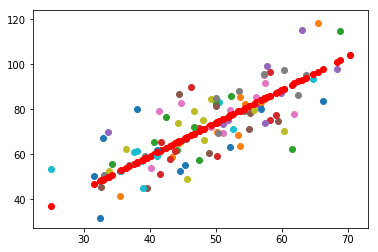

In [59]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100, 0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0, m = 0.0, error = 5565.10783448


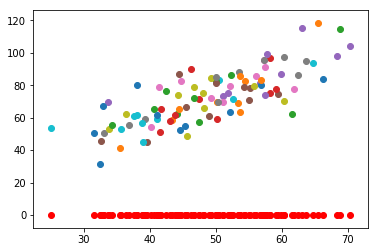

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0320719151316, m = 1.47886174167, error = 112.648860998


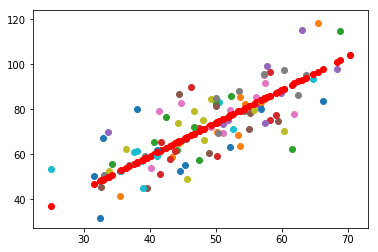

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


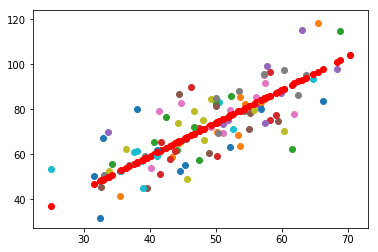

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0380769042728, m = 1.47874371544, error = 112.645253642


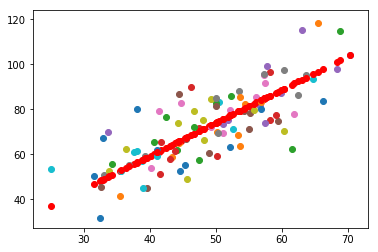

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0410777165877, m = 1.47868473539, error = 112.643451996


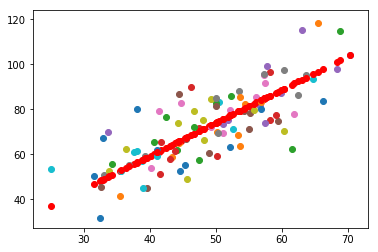

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0440774079517, m = 1.47862577737, error = 112.641651701


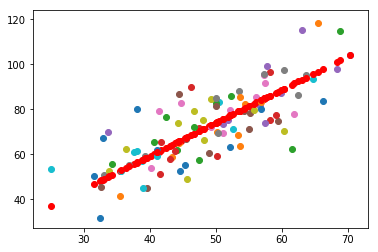

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0470759787795, m = 1.47856684137, error = 112.639852759


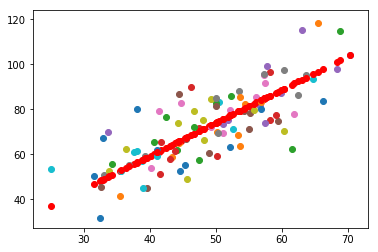

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0500734294852, m = 1.47850792739, error = 112.638055166


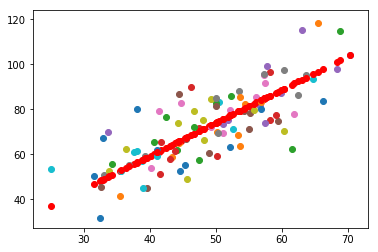

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0378680417748, m = 0.705009484854, error = 1603.9025065


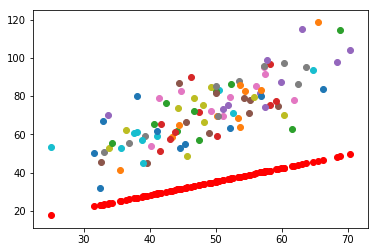

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = -79639423.4206, m = -4051928670.72, error = 4.09285179716e+22


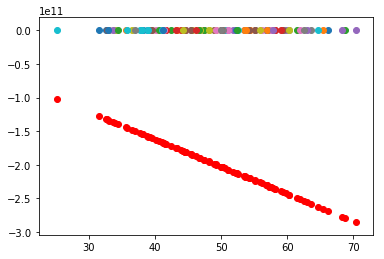

In [61]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(100, 0.00005 * num)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

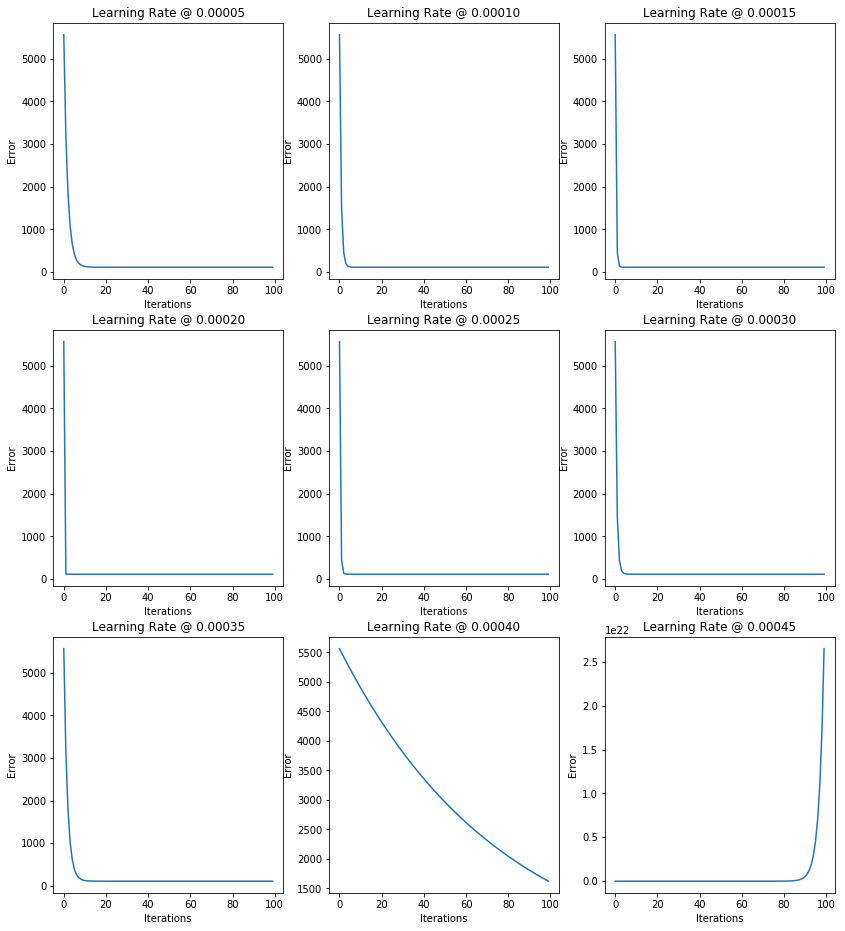

In [74]:
points = genfromtxt("../data/data.csv", delimiter=",")

fig = plt.figure(figsize=(14,16))

for i in range(0, 9):
    learning_rate = 0.00005 * float(i+1)
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    vec_error = []
    vec_nbite = []
    num_iterations = 100
    for j in range(0, num_iterations):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, j)
        error_ = compute_error_for_line_given_points(b, m, points)
        vec_error.append(error_)
        vec_nbite.append(j)
    
    axes = fig.add_subplot(3,3,i+1)
    axes.plot(vec_nbite, vec_error)
    axes.set_title('Learning Rate @ %.5f' % learning_rate)
    axes.set_xlabel('Iterations')
    axes.set_ylabel('Error')
    

**Response:**

Learning rate is a very important parameter in linear regression model. In fact, it is the step size in gradient descent algorithm. Choosing a good leanring rate is actually a trade-off between speed of convergence and success of convergence.From the results shown above, we found that if the learning rate is not suitable, it costs more iterations to make the errors convergent. Another interesting thing we can see from the results is that, if we set learning too high, the algorithm will be crashed since high step size will make the search far away from local minima.